In [1]:
import numpy as np
import pandas as pd
from sonnmf.utils import save_results, load_results
import matplotlib.pyplot as plt

# Region 1 (8x8)

In [2]:
M = np.load('../datasets/jasper_small_6.npz')['X']
m, n = M.shape
max_iters = 10000
r = n
_lam = 1200

In [3]:
w_methods = ['proximal_averaging', 'without_nonneg_restriction', 'subgradient', 'nesterov_smoothing']
h_accs = [0, 1]
save_filepath = '../saved_models/multiple_models/small_6_r{}_l{}_mit{}_wm_{}_ha{}.npz'

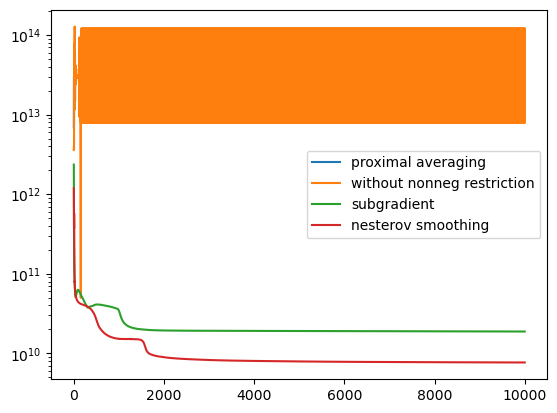

In [4]:
for wm in w_methods:
    W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters, wm, 0))
    plt.plot(fscores[1:] + gscores[1:] * lvals[:-1])
    plt.yscale('log')
plt.legend([x.replace('_', ' ') for x in w_methods])
# plt.title('Region 1 (8x8)')

/var/folders/jc/7j_g1mcd1tg130tgd6jxrx980000gn/T/ipykernel_10733/537207042.py:3: RuntimeWarning: invalid value encountered in multiply
  plt.plot(fscores[1:] + gscores[1:] * lvals[:-1])


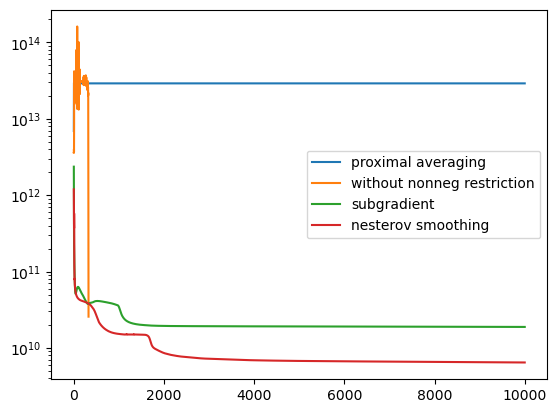

In [5]:
for wm in w_methods:
    W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters, wm, 1))
    plt.plot(fscores[1:] + gscores[1:] * lvals[:-1])
    plt.yscale('log')
plt.legend([x.replace('_', ' ') for x in w_methods])

In [6]:
df = pd.read_csv('../saved_models/multiple_models/output.csv')
df['time_taken'] /= 60

In [7]:
df_r1 = df[df['dataset'] == 'small_6']

In [8]:
df_r1

dataset             w_update_method  h_accelarated  time_taken  \
0  small_6          proximal_averaging              1   21.258637   
1  small_6                 subgradient              1  235.504313   
2  small_6          nesterov_smoothing              1  129.460266   
3  small_6  without_nonneg_restriction              1    0.698764   
4  small_6          proximal_averaging              0   21.517244   
5  small_6  without_nonneg_restriction              0   21.259046   
6  small_6                 subgradient              0  241.177398   
7  small_6          nesterov_smoothing              0  126.783958   

         fscore        gscore  scaled_lambda  
0  2.426233e+10  2.628612e+04   1.107611e+09  
1  1.568638e+07  1.235773e+11   1.523235e-01  
2  5.370213e+06  9.240473e+06   6.973995e+02  
3  2.567750e+10  0.000000e+00            inf  
4  2.426233e+10  2.628612e+04   1.107611e+09  
5  2.567750e+10  1.365574e-14   8.810757e+27  
6  1.568638e+07  1.235773e+11   1.523235e-01  
7  6.403828e+06  9.098141e+06   8.446337e+02

In [9]:
def plot_W_mats(W, figsize, fontsize, n_rows=1, filename=None, scale_y=False, plot_title=None):
    rank = W.shape[1]
    wmin, wmax = np.min(W), np.max(W)

    n_cols = int(np.ceil(rank / n_rows))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    axs = axs.ravel()

    for cnt, ax in enumerate(axs):
        if cnt < rank:
            ax.plot(W[:, cnt], linewidth=3)
            if scale_y:
                ax.set_ylim([min(0, wmin), wmax])

            ax.set_title(f'$w_{{{cnt + 1}}}$', fontsize=fontsize)
            ax.set_xlabel('Bands')
            ax.set_ylabel('Reflectance')
        else:
            ax.axis('off')

    plt.tight_layout()
    if plot_title:
        fig.suptitle(plot_title, fontsize=25)
    if filename:
        fig.savefig(filename)
        plt.close()

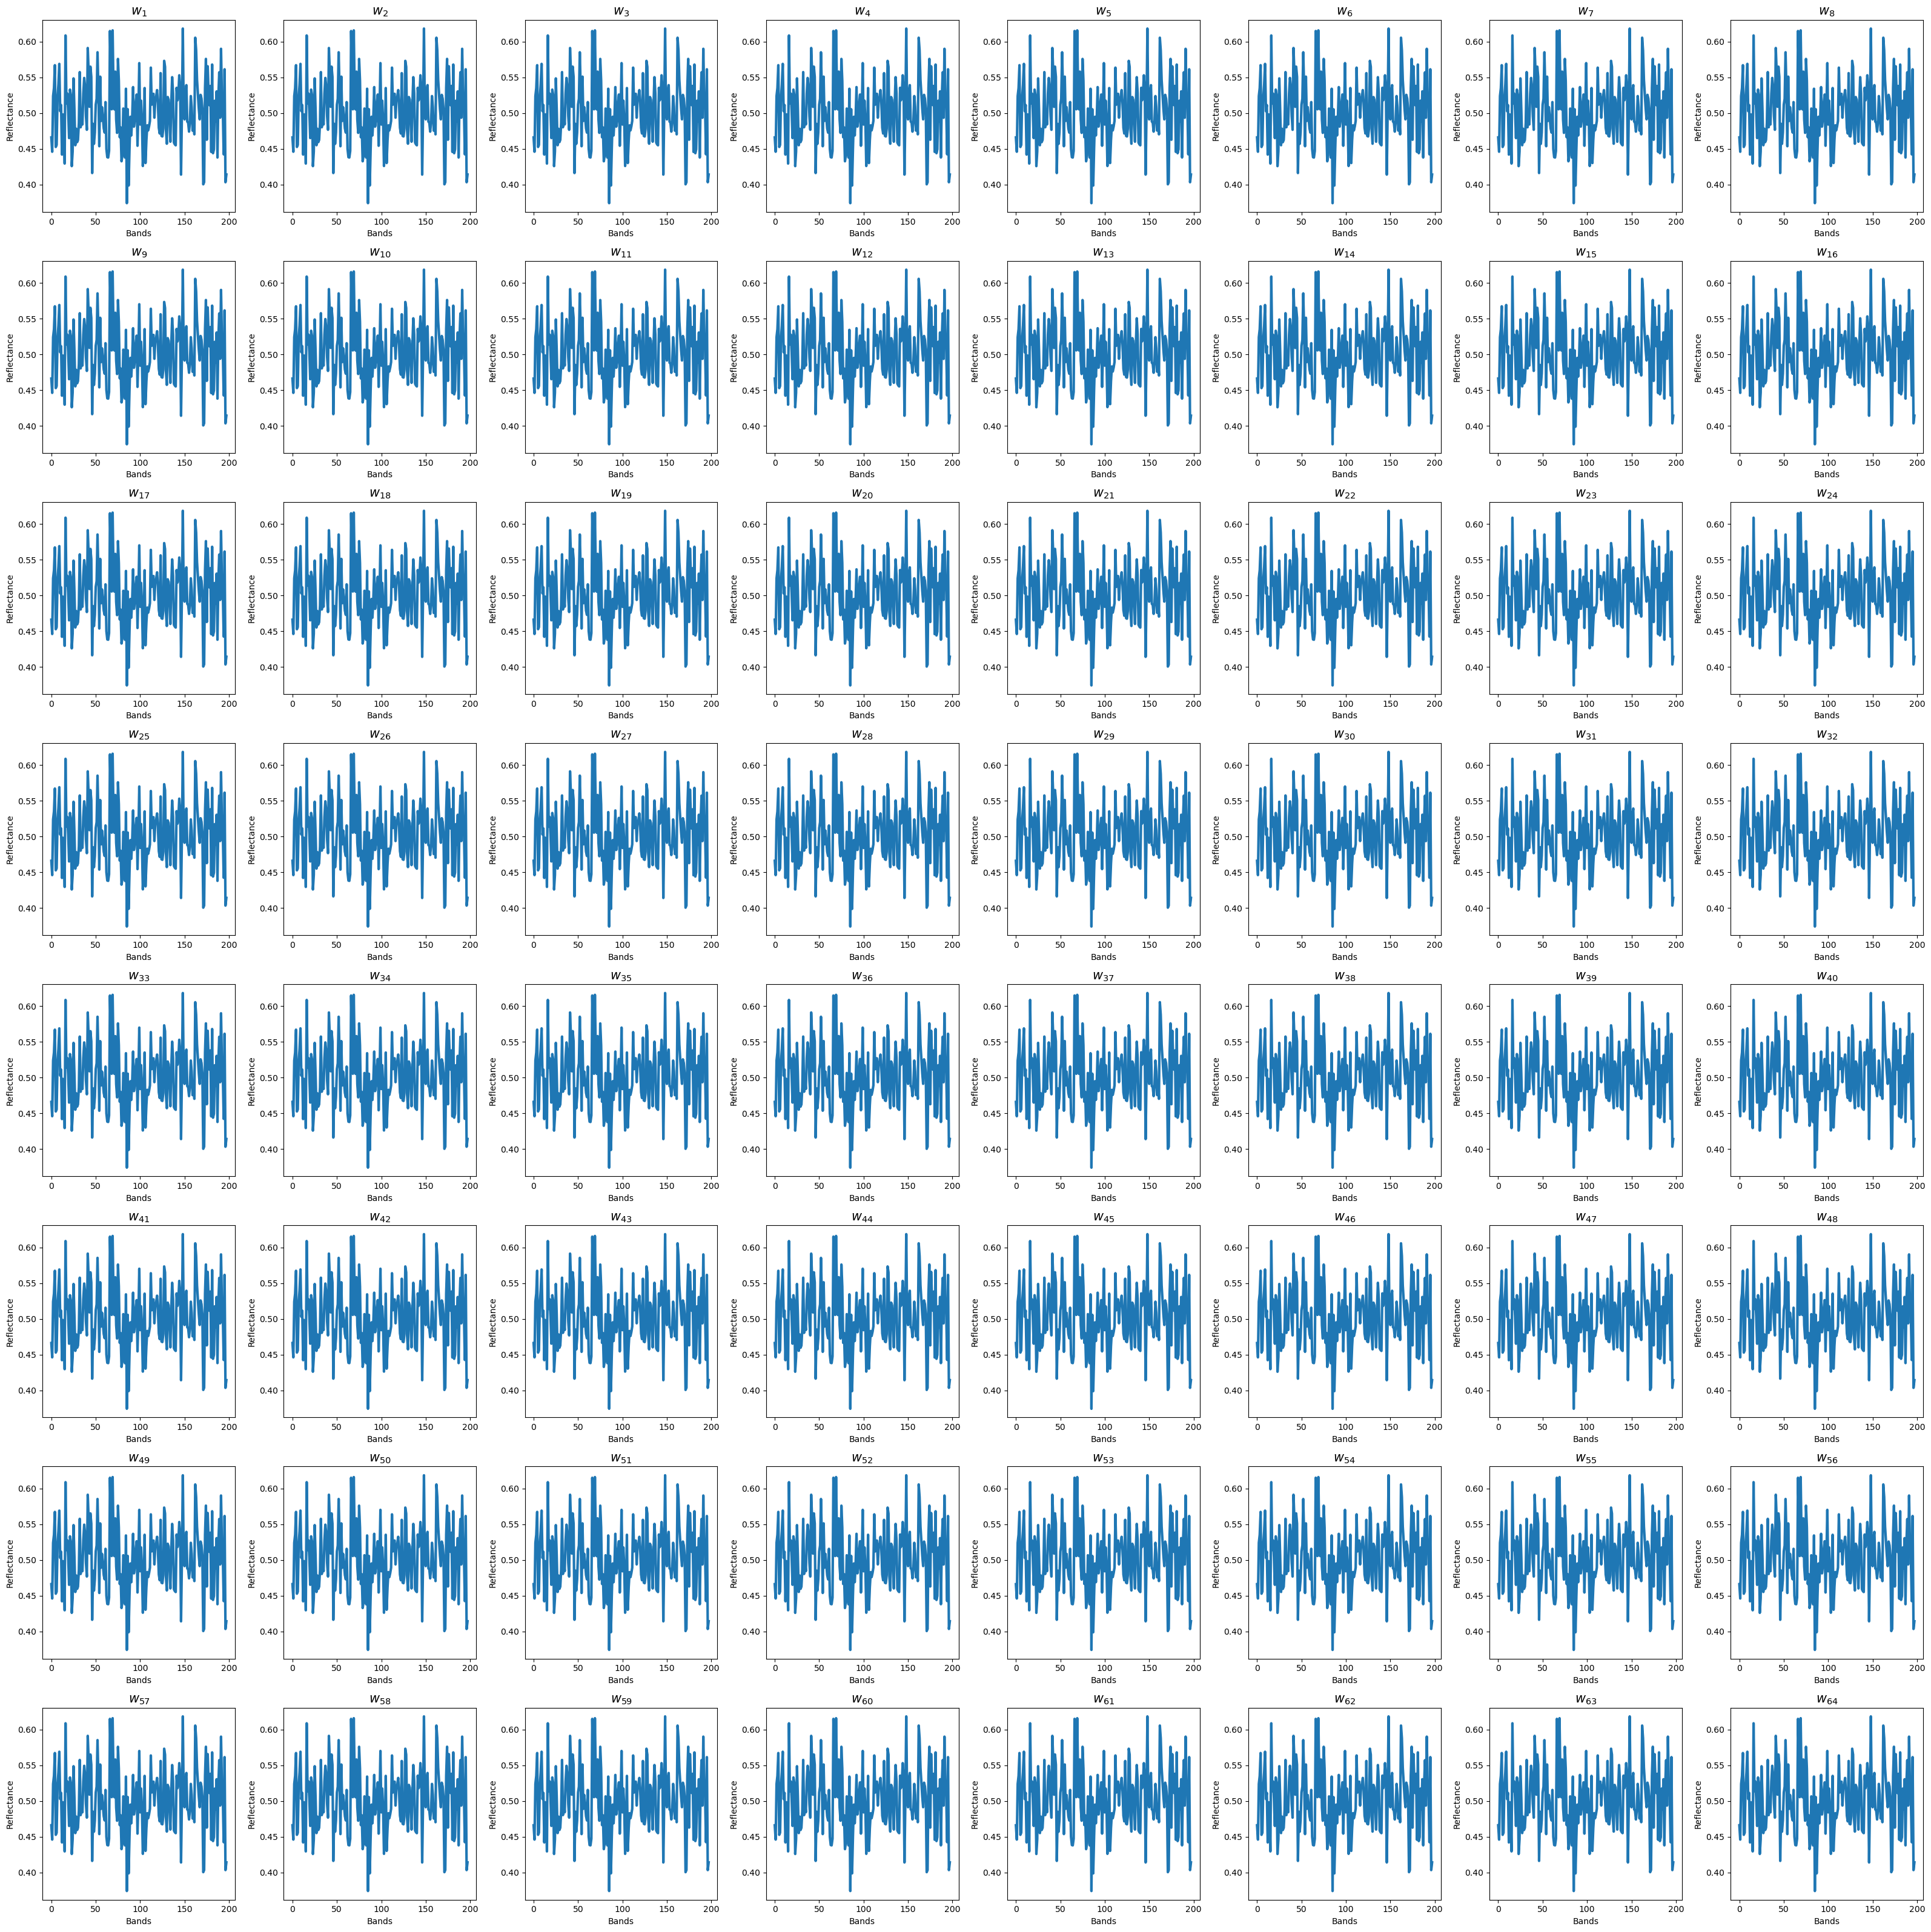

In [10]:
W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters, 'without_nonneg_restriction', 0))
plot_W_mats(W, (32, 32), 15, 8)

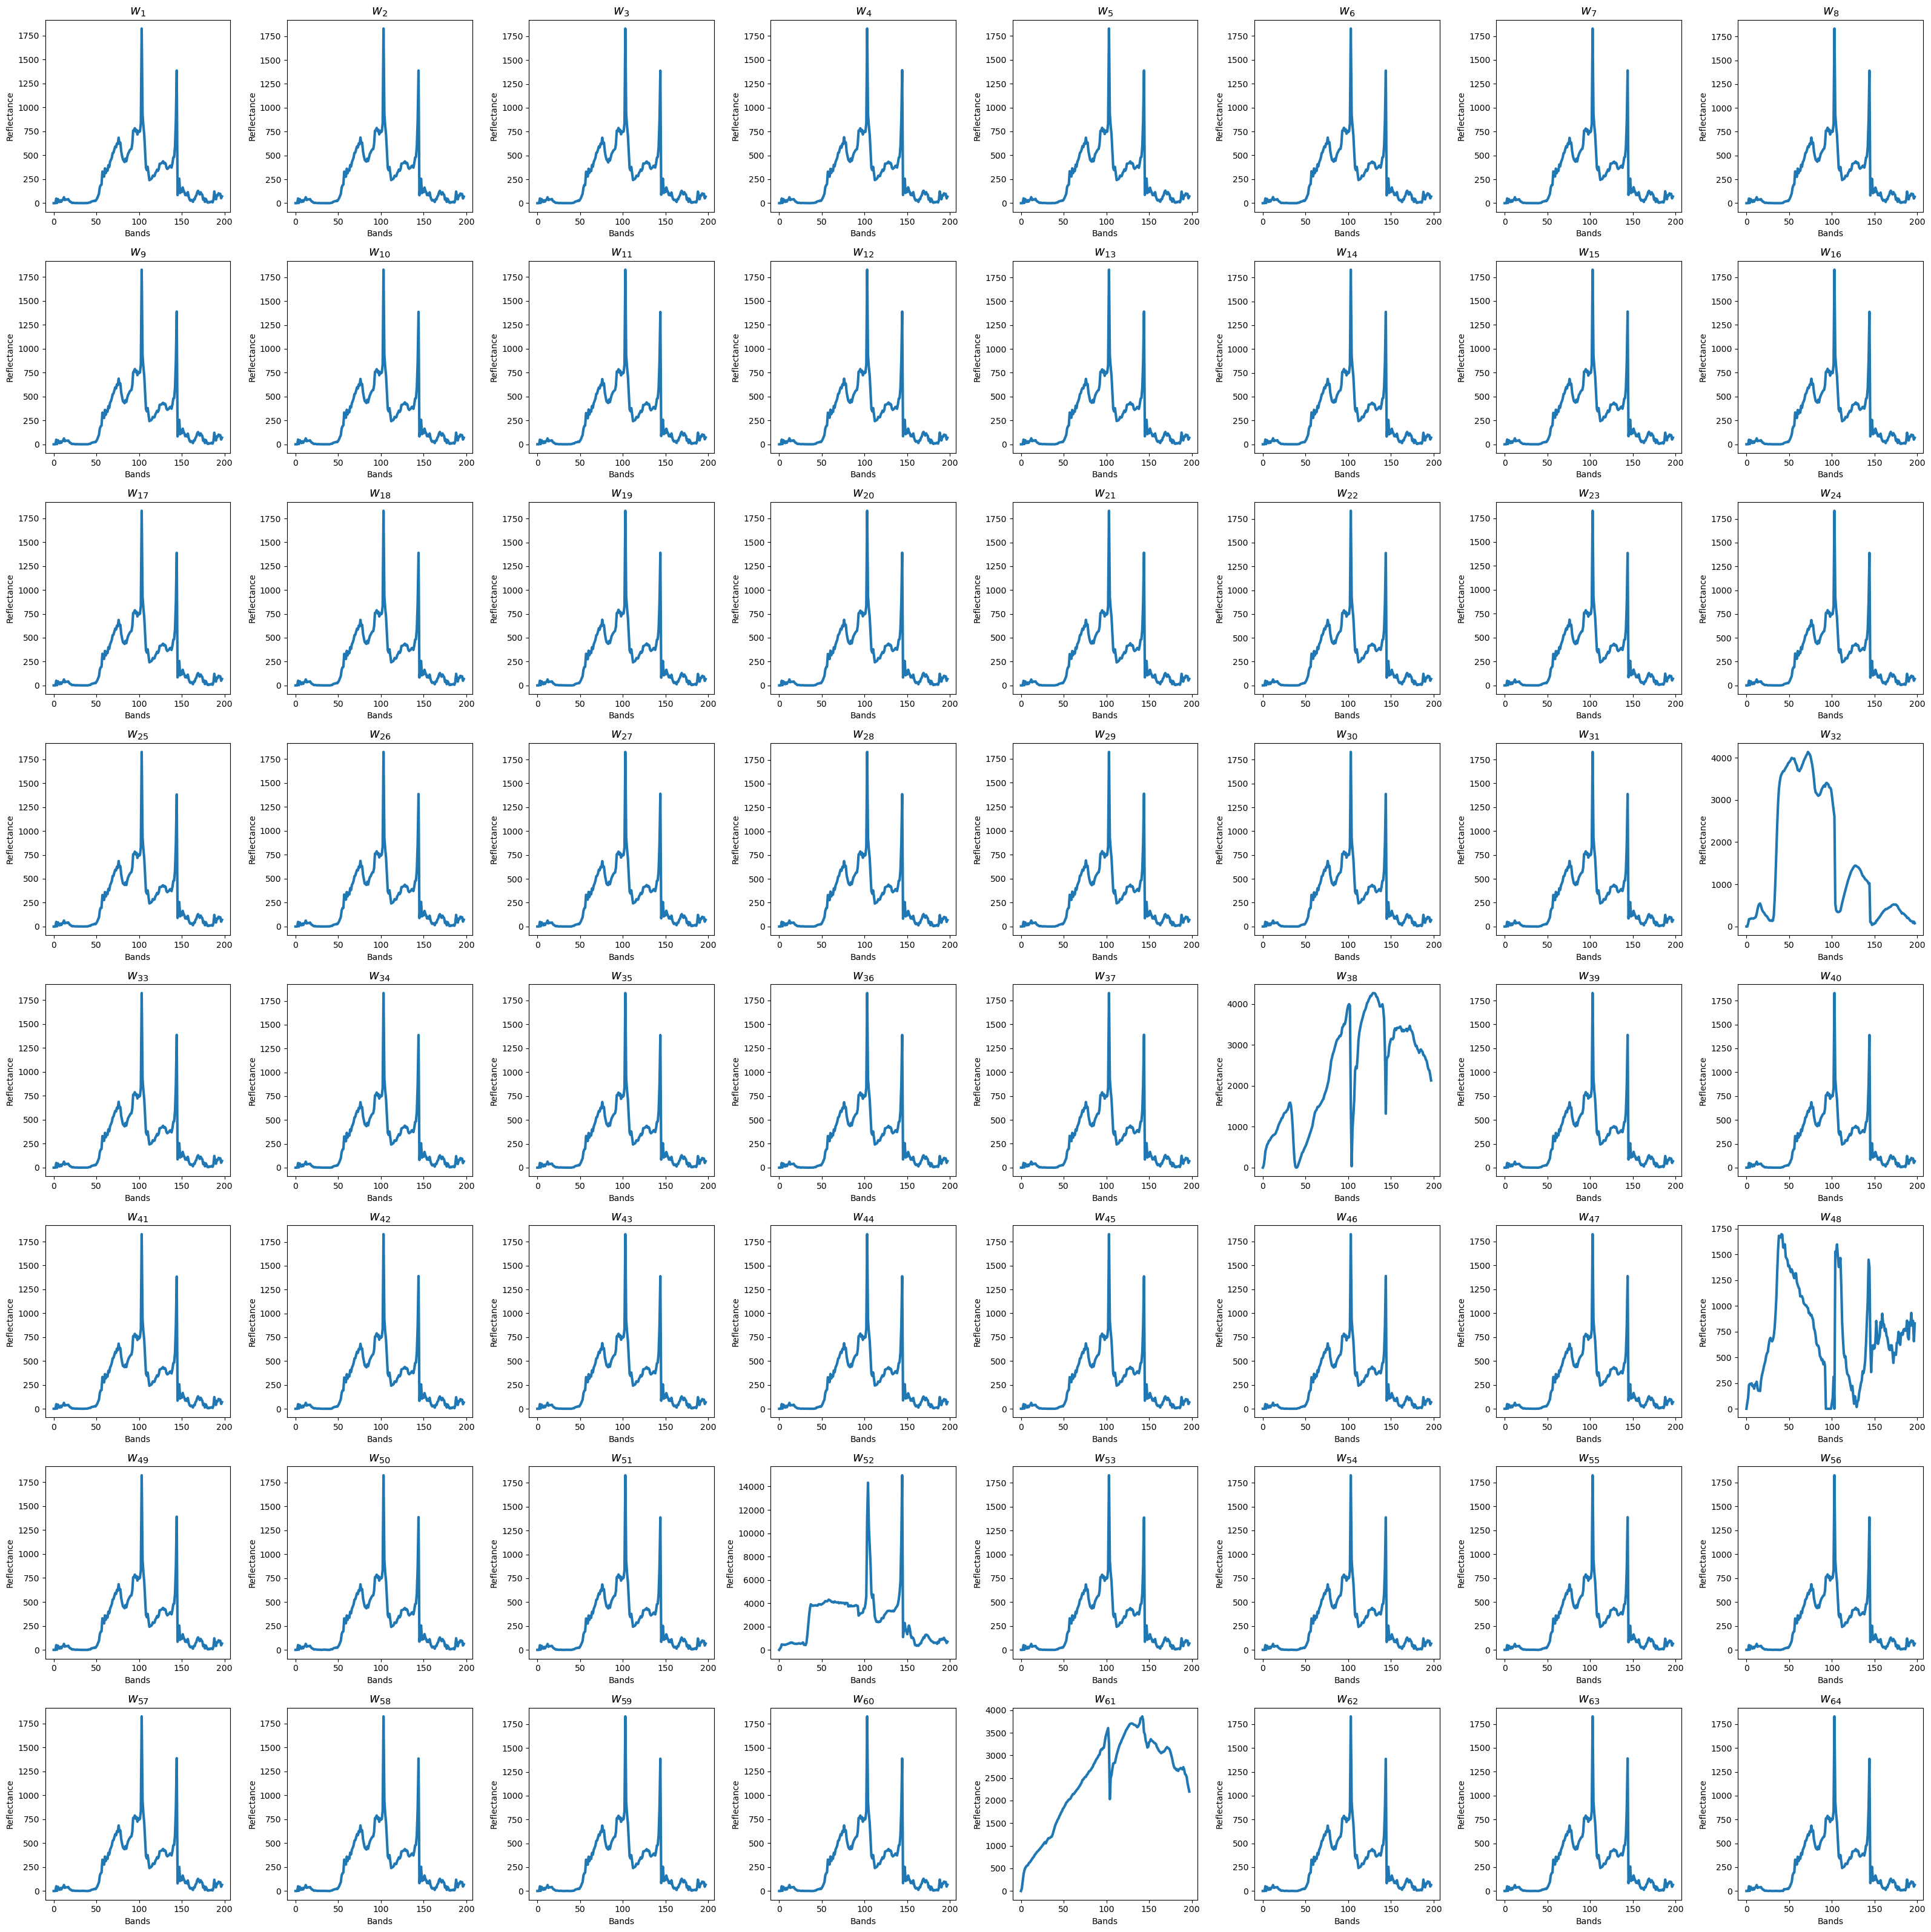

In [11]:
W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters, 'nesterov_smoothing', 0))
plot_W_mats(W, (32, 32), 15, 8)

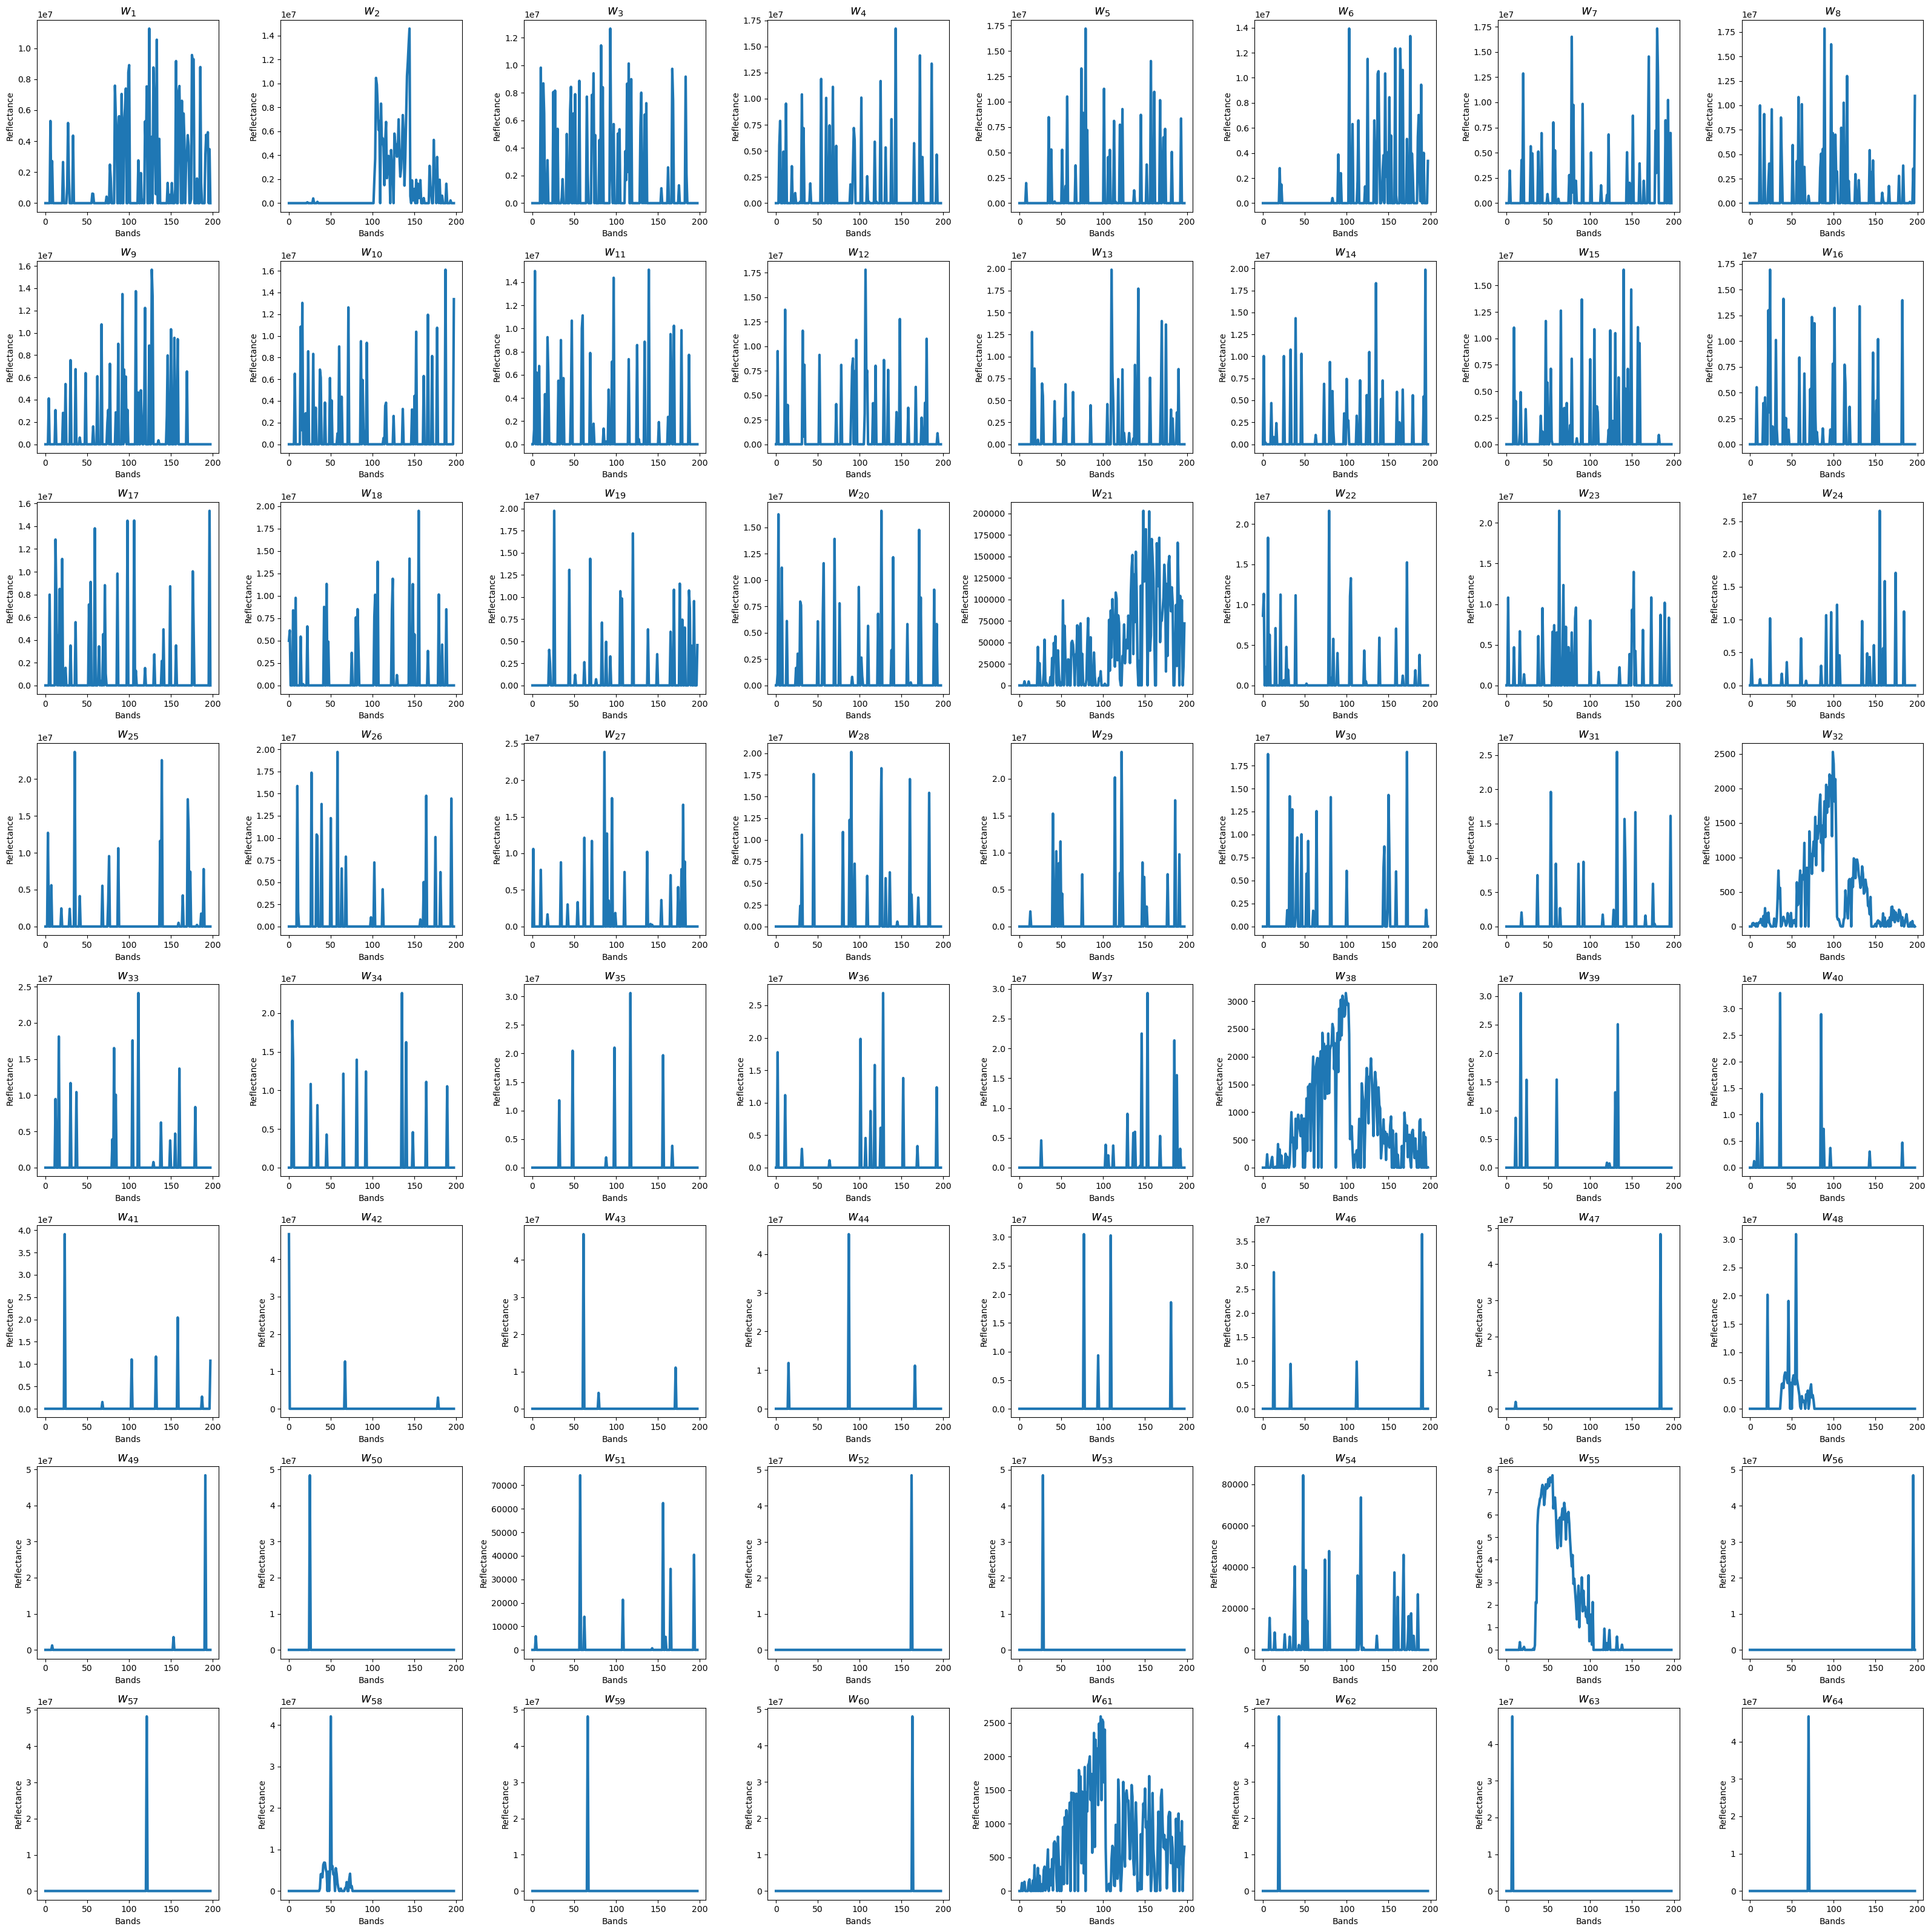

In [12]:
W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters, 'subgradient', 0))
plot_W_mats(W, (32, 32), 15, 8)